<a href="https://colab.research.google.com/github/vikamayr/MLprojects/blob/master/Tensorflow_visualize_detections.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import os
import pathlib

# Clone the tensorflow models repository if it doesn't already exist
if "models" in pathlib.Path.cwd().parts:
  while "models" in pathlib.Path.cwd().parts:
    os.chdir('..')
elif not pathlib.Path('models').exists():
  !git clone --depth 1 https://github.com/tensorflow/models

# Install tensorflow
#!pip install -U --pre tensorflow=="2.2.0"

In [6]:
# Mount google drive for copying files
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
# unzip datasets from google drive to the memory
!unzip drive/MyDrive/adversarial_images.zip

Archive:  drive/MyDrive/adversarial_images.zip
   creating: adversarial_images/
   creating: adversarial_images/efficientnet/
   creating: adversarial_images/efficientnet/deepfool/
   creating: adversarial_images/efficientnet/deepfool/000000000139/
  inflating: adversarial_images/efficientnet/deepfool/000000000139/eps0.01.jpg  
  inflating: adversarial_images/efficientnet/deepfool/000000000139/eps0.05.jpg  
  inflating: adversarial_images/efficientnet/deepfool/000000000139/eps0.1.jpg  
  inflating: adversarial_images/efficientnet/deepfool/000000000139/eps0.2.jpg  
   creating: adversarial_images/efficientnet/deepfool/000000001532/
  inflating: adversarial_images/efficientnet/deepfool/000000001532/eps0.01.jpg  
  inflating: adversarial_images/efficientnet/deepfool/000000001532/eps0.05.jpg  
  inflating: adversarial_images/efficientnet/deepfool/000000001532/eps0.1.jpg  
  inflating: adversarial_images/efficientnet/deepfool/000000001532/eps0.2.jpg  
   creating: adversarial_images/efficie

In [8]:
# Go to working directory
%cd /content/models/research

/content/models/research


In [9]:
!pip install --upgrade pip 

     |████████████████████████████████| 2.1 MB 5.1 MB/s 
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3


In [10]:
%%bash
# Compile protos.
protoc object_detection/protos/*.proto --python_out=.

# Install TensorFlow 2 Object Detection API.
cp object_detection/packages/tf2/setup.py .
python -m pip install .

Processing /content/models/research
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 43.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 352.1/352.1 KB 20.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 29.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.4/23.4 MB 32.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 35.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 29.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.7/90.7 KB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 37.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.8/47.8 MB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
multiprocess 0.70.12.2 requires dill>=0.3.4, but you have dill 0.3.1.1 which is incompatible.
gym 0.17.3 requires cloudpickle<1.7.0,>=1.2.0, but you have cloudpickle 2.0.0 which is incompatible.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [11]:
# Test the TF2 OD API installation
!python object_detection/builders/model_builder_tf2_test.py

2022-05-07 16:35:58.974465: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Running tests under Python 3.7.13: /usr/bin/python3
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_deepmac
W0507 16:35:59.298188 140376946853760 model_builder.py:1102] Building experimental DeepMAC meta-arch. Some features may be omitted.
INFO:tensorflow:time(__main__.ModelBuilderTF2Test.test_create_center_net_deepmac): 0.77s
I0507 16:35:59.748418 140376946853760 test_util.py:2374] time(__main__.ModelBuilderTF2Test.test_create_center_net_deepmac): 0.77s
[       OK ] ModelBuilderTF2Test.test_create_center_net_deepmac
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_model0 (customize_head_params=True)
INFO:tensorflow:time(__main__.ModelBuilderTF2Test.test_create_center_net_model0 (customize_head_params=True)): 0.59s
I0507 16:36:00.338068 140376946853760 test_util.py:2374] time(__main__.ModelBuilderTF2Test.test_cr

In [12]:
# Create folder for pre-trained model and checkpoints
!mkdir ./object_detection/checkpoints/
!mkdir ./object_detection/checkpoints/detection/
%cd ./object_detection/checkpoints/detection/

# Download models from tensorflow git and uncompress them

# EFFICIENTNET BASED MODELS
# Efficientdet D0 512x512
!curl "http://download.tensorflow.org/models/object_detection/tf2/20200711/efficientdet_d0_coco17_tpu-32.tar.gz" -o "efficientdet_d0_coco17_tpu-32.tar.gz"
!tar -xzf "efficientdet_d0_coco17_tpu-32.tar.gz"


#MOBILENET BASED MODELS
# SSD Mobilenet v2 320x320
!curl "http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_320x320_coco17_tpu-8.tar.gz" -o "ssd_mobilenet_v2_320x320_coco17_tpu-8.tar.gz"
!tar -xzf "ssd_mobilenet_v2_320x320_coco17_tpu-8.tar.gz"

# SSD Mobilenet V2 FPNLite 320x320
!curl "http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz" -o "ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz"
!tar -xzf "ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz"

# SSD Mobilenet V2 FPNLite 640x640
!curl "http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8.tar.gz" -o "ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8.tar.gz"
!tar -xzf "ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8.tar.gz"


#RESNET50 BASED MODELS
# Centernet Resnet50 V1 FPN 512x512
!curl "http://download.tensorflow.org/models/object_detection/tf2/20200711/centernet_resnet50_v1_fpn_512x512_coco17_tpu-8.tar.gz" -o "centernet_resnet50_v1_fpn_512x512_coco17_tpu-8.tar.gz"
!tar -xzf "centernet_resnet50_v1_fpn_512x512_coco17_tpu-8.tar.gz"

# Centernet Resnet50 V2 512x512
!curl "http://download.tensorflow.org/models/object_detection/tf2/20200711/centernet_resnet50_v2_512x512_coco17_tpu-8.tar.gz" -o "centernet_resnet50_v2_512x512_coco17_tpu-8.tar.gz"
!tar -xzf "centernet_resnet50_v2_512x512_coco17_tpu-8.tar.gz"

# Faster R-CNN ResNet50 V1 640x640 OVER 40ms speed models for comparison
!curl "http://download.tensorflow.org/models/object_detection/tf2/20200711/faster_rcnn_resnet50_v1_640x640_coco17_tpu-8.tar.gz" -o "faster_rcnn_resnet50_v1_640x640_coco17_tpu-8.tar.gz"
!tar -xzf "faster_rcnn_resnet50_v1_640x640_coco17_tpu-8.tar.gz"


# RESNET100 BASED MODELS
# Centernet Resnet101 V1 FPN 512x512
!curl "http://download.tensorflow.org/models/object_detection/tf2/20200711/centernet_resnet101_v1_fpn_512x512_coco17_tpu-8.tar.gz" -o "centernet_resnet101_v1_fpn_512x512_coco17_tpu-8.tar.gz"
!tar -xzf "centernet_resnet101_v1_fpn_512x512_coco17_tpu-8.tar.gz"

# Remove zip files after uncompression
#Resnet50
!rm "centernet_resnet50_v1_fpn_512x512_coco17_tpu-8.tar.gz"
!rm "centernet_resnet50_v2_512x512_coco17_tpu-8.tar.gz"
!rm "faster_rcnn_resnet50_v1_640x640_coco17_tpu-8.tar.gz"
#Resnet100
!rm "centernet_resnet101_v1_fpn_512x512_coco17_tpu-8.tar.gz"
#EfficientNet
!rm "efficientdet_d0_coco17_tpu-32.tar.gz"
#MobilenetV2
!rm "ssd_mobilenet_v2_320x320_coco17_tpu-8.tar.gz"
!rm "ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz"
!rm "ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8.tar.gz"

/content/models/research/object_detection/checkpoints/detection
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 29.3M  100 29.3M    0     0   147M      0 --:--:-- --:--:-- --:--:--  146M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 43.9M  100 43.9M    0     0   146M      0 --:--:-- --:--:-- --:--:--  146M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 19.5M  100 19.5M    0     0   104M      0 --:--:-- --:--:-- --:--:--  104M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 19.5M  100 19.5M    0     0  80.5M      0 --:--:-- --:--:-- --:

In [13]:
# change working directory and check that models were downloaded into correct folder
%cd /content/models/research
!ls object_detection/checkpoints/detection
!ls ./object_detection/checkpoints/detection/ssd_mobilenet_v2_320x320_coco17_tpu-8/saved_model/


/content/models/research
centernet_resnet101_v1_fpn_512x512_coco17_tpu-8
centernet_resnet50_v1_fpn_512x512_coco17_tpu-8
centernet_resnet50_v2_512x512_coco17_tpu-8
efficientdet_d0_coco17_tpu-32
faster_rcnn_resnet50_v1_640x640_coco17_tpu-8
ssd_mobilenet_v2_320x320_coco17_tpu-8
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8
ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8
saved_model.pb	variables


In [14]:
import matplotlib
import matplotlib.pyplot as plt

import io
import scipy.misc
import numpy as np
from six import BytesIO
from PIL import Image, ImageDraw, ImageFont

import tensorflow as tf

from object_detection.utils import label_map_util
from object_detection.utils import config_util
from object_detection.utils import visualization_utils as vis_util
from object_detection.builders import model_builder
from object_detection.utils import ops as utils_ops

%matplotlib inline

In [15]:
model_centernet_resnet50_v1_fpn_512x512 = tf.saved_model.load("/content/models/research/object_detection/checkpoints/detection/centernet_resnet50_v1_fpn_512x512_coco17_tpu-8/saved_model")
model_centernet_resnet101_v1_fpn_512x512 = tf.saved_model.load("/content/models/research/object_detection/checkpoints/detection/centernet_resnet101_v1_fpn_512x512_coco17_tpu-8/saved_model")
model_centernet_resnet50_v2_512x512 = tf.saved_model.load("/content/models/research/object_detection/checkpoints/detection/centernet_resnet50_v2_512x512_coco17_tpu-8/saved_model")
model_efficientdet_d0 = tf.saved_model.load("/content/models/research/object_detection/checkpoints/detection/efficientdet_d0_coco17_tpu-32/saved_model")
model_ssd_mobilenet_v2_320x320 = tf.saved_model.load("/content/models/research/object_detection/checkpoints/detection/ssd_mobilenet_v2_320x320_coco17_tpu-8/saved_model")
model_ssd_mobilenet_v2_fpnlite_320x320 = tf.saved_model.load("/content/models/research/object_detection/checkpoints/detection/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model")
model_ssd_mobilenet_v2_fpnlite_640x640 = tf.saved_model.load("/content/models/research/object_detection/checkpoints/detection/ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8/saved_model")

In [16]:
def run_inference_for_single_image(model, image):
  # The input needs to be a tensor, convert it using `tf.convert_to_tensor`.
  input_tensor = tf.convert_to_tensor(image)
  # The model expects a batch of images, so add an axis with `tf.newaxis`.
  input_tensor = input_tensor[tf.newaxis,...]
  output_dict = model(input_tensor)
  # All outputs are batches tensors.
  # Convert to numpy arrays, and take index [0] to remove the batch dimension.
  num_detections = int(output_dict.pop('num_detections'))
  output_dict = {key:value[0, :num_detections].numpy() 
                 for key,value in output_dict.items()}
  output_dict['num_detections'] = num_detections

  # detection_classes should be ints.
  output_dict['detection_classes'] = output_dict['detection_classes'].astype(np.int64)
    
  return output_dict

In [17]:
def show_inference(model, image_path):
  # the array based representation of the image will be used later in order to prepare the
  # result image with boxes and labels on it.
  image_np = np.array(Image.open(image_path))
  output_dict = run_inference_for_single_image(model, image_np)

  #Filter results according to treshold value
  boxes = output_dict['detection_boxes']
  scores = output_dict['detection_scores']
  classes = output_dict['detection_classes']
  
  #set a min thresh score, 0.5
  min_score_thresh = 0.5

  #Create new dictionary with given treshold for each image
  detection_boxes = boxes[scores > min_score_thresh]
  detection_classes = classes[scores > min_score_thresh]
  detection_scores = scores[scores > min_score_thresh]
  new_dict = {
      'detection_boxes' : detection_boxes,
      'detection_classes' : detection_classes,
      'detection_scores' : detection_scores
      }

  #create visualizations
  vis_util.visualize_boxes_and_labels_on_image_array(
    image_np,
    new_dict['detection_boxes'],
    new_dict['detection_classes'],
    new_dict['detection_scores'],
    category_index,
    use_normalized_coordinates=True,
    max_boxes_to_draw=100,
    line_thickness=2)

  #return visualized image
  return image_np

In [18]:
def get_predictions(model, image_path):
  image_np = np.array(Image.open(image_path))
  output_dict = run_inference_for_single_image(model, image_np)

  #Filter results according to treshold value
  boxes = output_dict['detection_boxes']
  scores = output_dict['detection_scores']
  classes = output_dict['detection_classes']
  
  #set a min thresh score
  min_score_thresh = 0.5
  
  detection_boxes = boxes[scores > min_score_thresh]
  detection_classes = classes[scores > min_score_thresh]
  detection_scores = scores[scores > min_score_thresh]
  num_detections = len(detection_scores)
  decetion_classes_names = map_to_class(detection_classes)

  # filtering out detection in order to get only the one that are indeed detections
  new_dict = {
      'detection_boxes' : detection_boxes,
      'detection_classes' : detection_classes,
      'class_names' : decetion_classes_names,
      'detection_scores' : detection_scores,
      'num_detections' : num_detections
  }

  return new_dict


In [19]:
def map_to_class(list_id):
  new_list = []
  for x in list_id:
    for item in category_index.items():
      if item[1]['id'] == x:
        new_list.append((item[1]['name']))
  return new_list

In [20]:
PATH_TO_LABELS = './object_detection/data/mscoco_label_map.pbtxt'
category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS, use_display_name=True)

In [31]:
print("|||Attack Models|||")
!ls '/content/adversarial_images'
print()
print("|||Attack Algorithms|||")
!ls '/content/adversarial_images/efficientnet/'
print()
print("|||Adversarial Examples|||")
!ls '/content/adversarial_images/efficientnet/fgsm/'
print()
print("|||Epsilon values|||")
!ls '/content/adversarial_images/efficientnet/fgsm/000000001532'


PATH_TO_ADVERSARIAL_IMAGES_DIR = pathlib.Path('/content/adversarial_images/efficientnet/fgsm/000000001532') #FGSM
#PATH_TO_TEST_IMAGES_DIR = pathlib.Path('/content/adversarial_images/mobilenet/pgd/000000424162') #PGD
TEST_IMAGE_PATHS = sorted(list(PATH_TO_TEST_IMAGES_DIR.glob("*.jpg")))

|||Attack Models|||
efficientnet  mobilenet  resnet

|||Attack Algorithms|||
deepfool  fgsm	pgd

|||Adversarial Examples|||
000000000139  000000001532  000000006471  000000226417	000000424162

|||Epsilon values|||
eps0.01.jpg  eps0.03.jpg  eps0.05.jpg  eps0.07.jpg  eps0.09.jpg
eps0.02.jpg  eps0.04.jpg  eps0.06.jpg  eps0.08.jpg  eps0.1.jpg


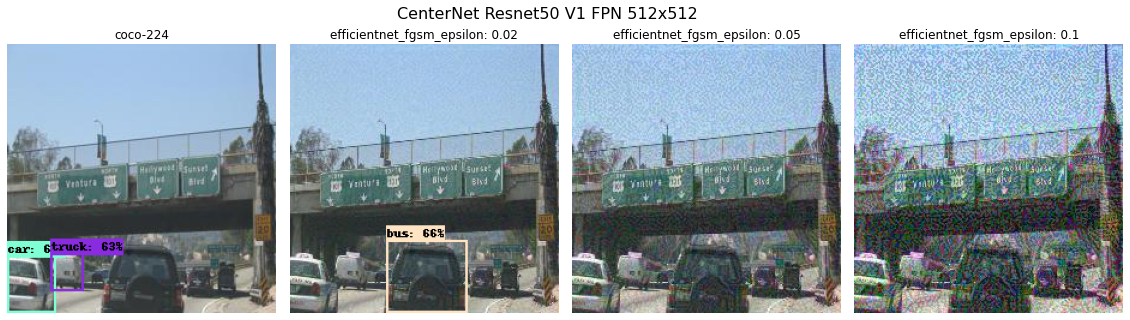

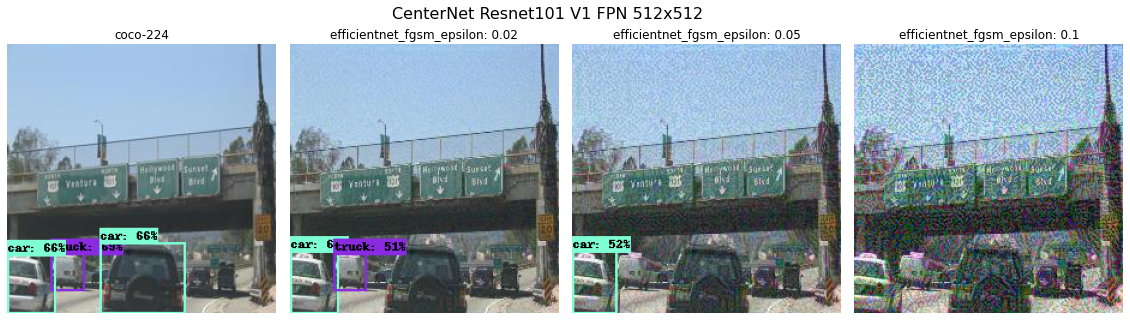

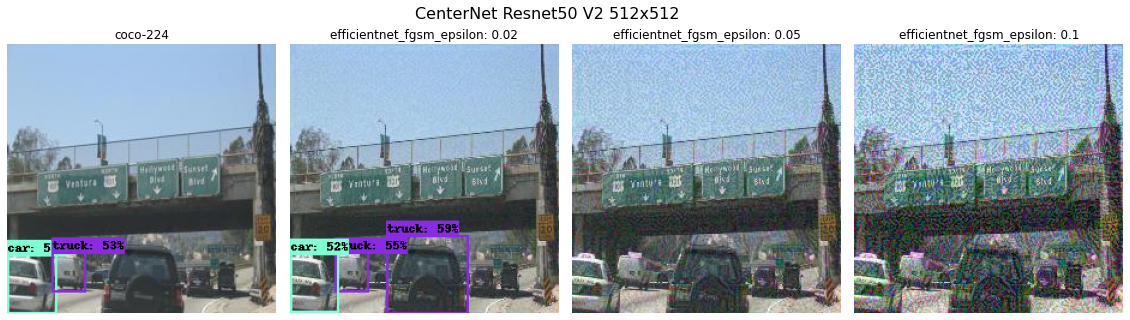

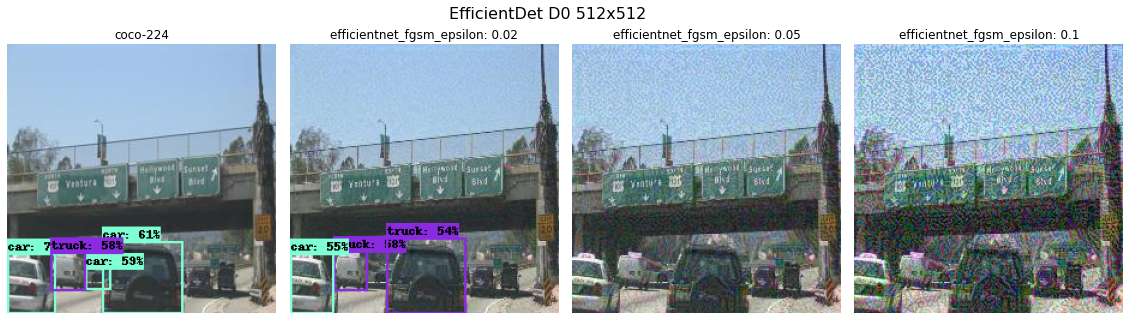

In [ ]:
# VISUALIZING Adversarial IMAGES IN ROW

lista = []
attack = []

models = [model_centernet_resnet50_v1_fpn_512x512,
model_centernet_resnet101_v1_fpn_512x512,
model_centernet_resnet50_v2_512x512,
model_efficientdet_d0,
model_ssd_mobilenet_v2_320x320,
model_ssd_mobilenet_v2_fpnlite_320x320,
model_ssd_mobilenet_v2_fpnlite_640x640]

model_name = ["CenterNet Resnet50 V1 FPN 512x512",
"CenterNet Resnet101 V1 FPN 512x512",
"CenterNet Resnet50 V2 512x512",
"EfficientDet D0 512x512",
"SSD MobileNet v2 320x320",
"SSD MobileNet V2 FPNLite 320x320",
"SSD MobileNet V2 FPNLite 640x640"]

for image_path in TEST_IMAGE_PATHS:
  epsilon=str(image_path).split('/')[-1].split('.jpg')[0].split('eps')[-1]
  folders=str(image_path).split('/')
  adversary_type=folders[3] + '_' + folders[4] + '_' + 'epsilon: ' + epsilon
  #print(adversary_type)
  if epsilon == "0.02" or epsilon == "0.05" or epsilon == "0.1":
    lista.append(image_path)
    attack.append(adversary_type)

counter = 0
for model,name in zip(models, model_name):
  orig = show_inference(model, "/content/drive/MyDrive/normal_images/000000001532original.jpg")
  small = show_inference(model, "/content/drive/MyDrive/normal_images/000000001532small.jpg")
  low = show_inference(model, lista[0])
  med = show_inference(model, lista[1])
  high = show_inference(model, lista[2])


  fig, ax = plt.subplots(1, 4, figsize=(20,5))
  fig.suptitle(str(name), fontsize=16)
  #ax[0].imshow(orig)
  #ax[0].text(0,0.5,str(name))

  ax[0].imshow(small)
  ax[1].imshow(low)
  ax[2].imshow(med)
  ax[3].imshow(high)
  #if counter == 0:
  ax[0].set_title('coco-224')
  ax[1].set_title(attack[0])
  ax[2].set_title(attack[1])
  ax[3].set_title(attack[2])
  ax[0].axis('off')
  ax[1].axis('off')
  ax[2].axis('off')
  ax[3].axis('off')
  plt.subplots_adjust(wspace=0.05, hspace=0)
  plt.show()
  counter += 1

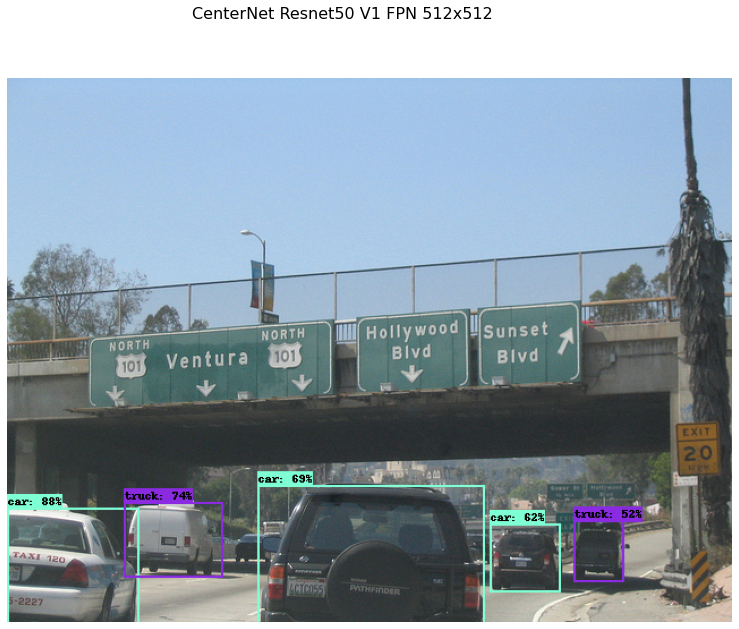

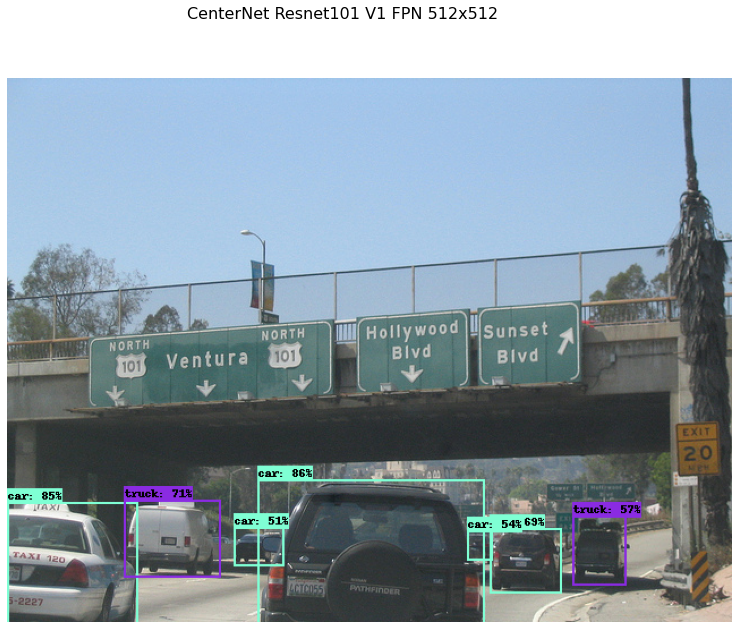

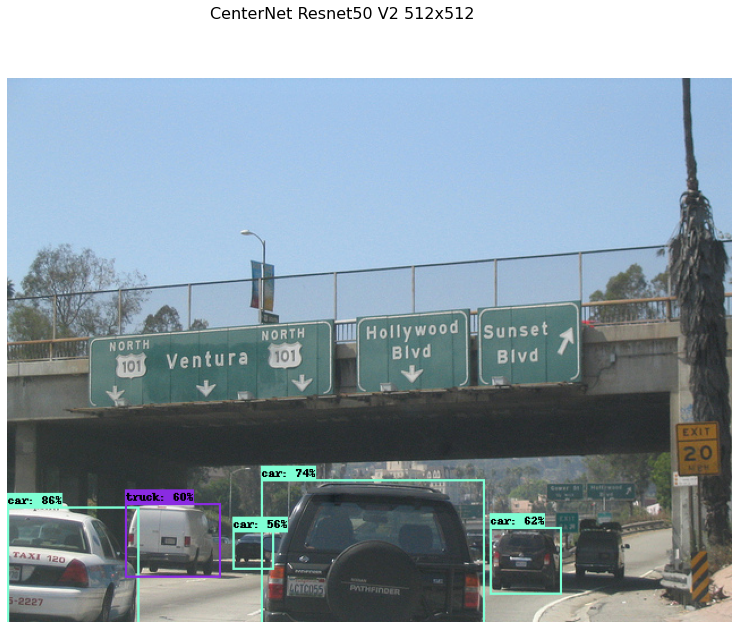

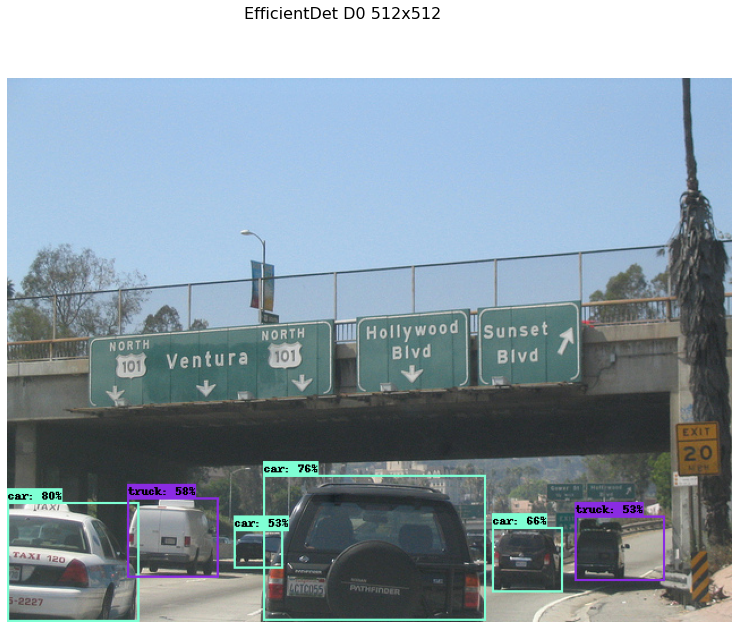

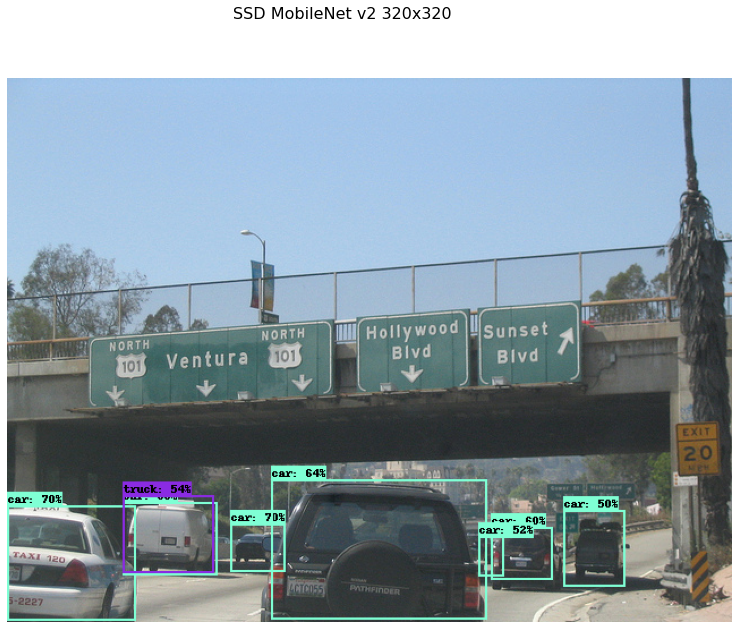

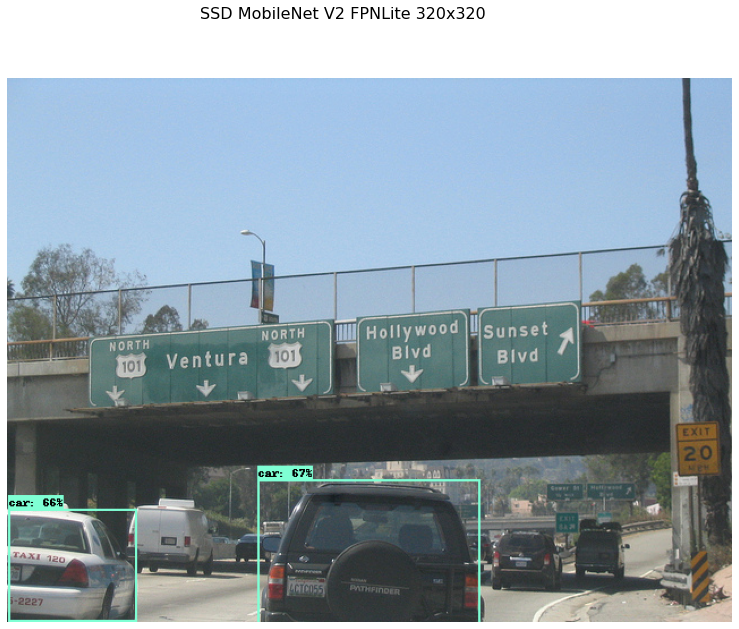

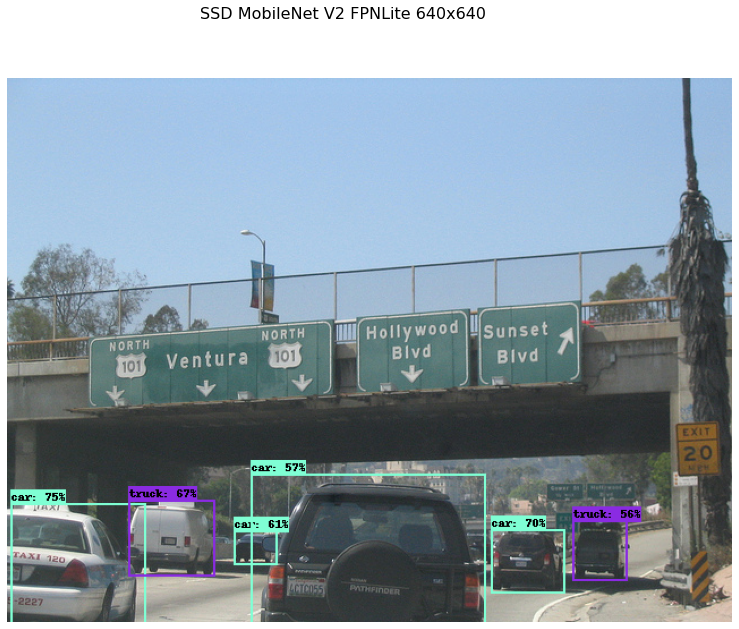

In [33]:
# VISUALIZING ORIGINAL IMAGE

lista = []
attack = []

models = [model_centernet_resnet50_v1_fpn_512x512,
model_centernet_resnet101_v1_fpn_512x512,
model_centernet_resnet50_v2_512x512,
model_efficientdet_d0,
model_ssd_mobilenet_v2_320x320,
model_ssd_mobilenet_v2_fpnlite_320x320,
model_ssd_mobilenet_v2_fpnlite_640x640]

model_name = ["CenterNet Resnet50 V1 FPN 512x512",
"CenterNet Resnet101 V1 FPN 512x512",
"CenterNet Resnet50 V2 512x512",
"EfficientDet D0 512x512",
"SSD MobileNet v2 320x320",
"SSD MobileNet V2 FPNLite 320x320",
"SSD MobileNet V2 FPNLite 640x640"]

for image_path in TEST_IMAGE_PATHS:
  epsilon=str(image_path).split('/')[-1].split('.jpg')[0].split('eps')[-1]
  folders=str(image_path).split('/')
  adversary_type=folders[3] + '_' + folders[4] + '_' + 'epsilon: ' + epsilon
  #print(adversary_type)
  if epsilon == "0.02" or epsilon == "0.05" or epsilon == "0.1":
    lista.append(image_path)
    attack.append(adversary_type)

counter = 0
for model,name in zip(models, model_name):
  orig = show_inference(model, "/content/drive/MyDrive/normal_images/000000001532original.jpg")
  
  plt.figure(figsize = (30,10))
  plt.imshow(orig)
  plt.suptitle(str(name), fontsize=16)
  plt.axis('off')
  plt.show()
  counter += 1